<a href="https://colab.research.google.com/github/tca-codes/fraudulent-transactions/blob/main/ANGELES_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load the Dataset

In [1]:
# Import needed Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix, r2_score, mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
filename = '/content/Fraud.csv'
df = pd.read_csv(filename)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
83556,10,PAYMENT,7705.70,C1834114901,96490.0,88784.30,M1214836727,0.00,0.00,0.0,0.0
83557,10,CASH_OUT,319045.01,C1964329082,56471.0,0.00,C699133054,0.00,319045.01,0.0,0.0
83558,10,CASH_IN,249169.96,C1421944154,3481.0,252650.96,C790672270,38177.07,0.00,0.0,0.0
83559,10,CASH_OUT,244279.64,C722886752,29968.0,0.00,C1492538502,25680.00,269959.64,0.0,0.0


#Clean the Dataset

In [3]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83561 entries, 0 to 83560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            83561 non-null  int64  
 1   type            83561 non-null  object 
 2   amount          83561 non-null  float64
 3   nameOrig        83561 non-null  object 
 4   oldbalanceOrg   83560 non-null  float64
 5   newbalanceOrig  83560 non-null  float64
 6   nameDest        83560 non-null  object 
 7   oldbalanceDest  83560 non-null  float64
 8   newbalanceDest  83560 non-null  float64
 9   isFraud         83560 non-null  float64
 10  isFlaggedFraud  83560 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 7.0+ MB


Check if there are any Duplicated Rows

In [5]:
df.duplicated().sum()

0

Check each column and correct inconsistent values

In [6]:
df['step'].value_counts(dropna=False)

9     37628
8     21097
10    10835
7      6837
1      2708
6      1660
2      1014
5       665
4       565
3       552
Name: step, dtype: int64

In [7]:
df['type'].value_counts(dropna=False)

PAYMENT     33529
CASH_OUT    25156
CASH_IN     16818
TRANSFER     7192
DEBIT         866
Name: type, dtype: int64

In [8]:
df['amount'].value_counts(dropna=False)

29707.86     3
89631.24     3
17320.91     3
2475.13      3
25975.86     3
            ..
100790.27    1
81294.79     1
129769.02    1
88293.28     1
145014.63    1
Name: amount, Length: 83149, dtype: int64

In [9]:
df['nameOrig'].value_counts(dropna=False)

C1231006815    1
C1892929983    1
C215263093     1
C958960621     1
C339685866     1
              ..
C1085227578    1
C1104315585    1
C872759772     1
C1479228131    1
C60491101      1
Name: nameOrig, Length: 83561, dtype: int64

In [10]:
df['oldbalanceOrg'].value_counts(dropna=False)

0.00        26061
164.00         17
181.00         17
186.00         17
198.00         17
            ...  
77858.16        1
56994.11        1
38069.19        1
21556.57        1
NaN             1
Name: oldbalanceOrg, Length: 49284, dtype: int64

In [11]:
df['newbalanceOrig'].value_counts(dropna=False)

0.00          43166
4910403.44        3
2156386.80        2
8499043.13        2
12239.24          2
              ...  
695.52            1
18053.40          1
45614.70          1
39904.10          1
NaN               1
Name: newbalanceOrig, Length: 40352, dtype: int64

In [12]:
df['nameDest'].value_counts(dropna=False)

C985934102     78
C1286084959    69
C248609774     69
C1590550415    67
C2083562754    65
               ..
M1232968184     1
M1090964764     1
M687125693      1
M1839385728     1
NaN             1
Name: nameDest, Length: 43958, dtype: int64

In [13]:
df['oldbalanceDest'].value_counts(dropna=False)

0.00          38417
102.00            7
214.00            5
103.00            5
192.00            4
              ...  
7853953.80        1
6308760.05        1
1739590.52        1
1110947.02        1
NaN               1
Name: oldbalanceDest, Length: 44661, dtype: int64

In [14]:
df['newbalanceDest'].value_counts(dropna=False)

0.00           39404
971418.91         32
19169204.93       29
1254956.07        25
16532032.16       25
               ...  
415664.97          1
251479.29          1
53238.07           1
146263.01          1
NaN                1
Name: newbalanceDest, Length: 14871, dtype: int64

In [15]:
df['isFraud'].value_counts(dropna=False)

0.0    83448
1.0      112
NaN        1
Name: isFraud, dtype: int64

In [16]:
df['isFlaggedFraud'].value_counts(dropna=False)

0.0    83560
NaN        1
Name: isFlaggedFraud, dtype: int64

In [17]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [18]:
df = df.dropna()

In [19]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#Explore the Dataset

Check correlation between features.

In [20]:
corr = df.corr()

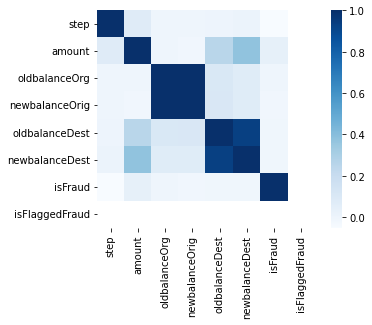

In [21]:
sns.heatmap(corr, square=True, cmap='Blues');

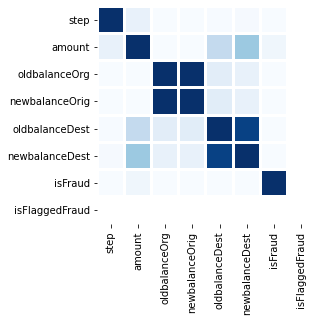

In [22]:
sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues');

newbalanceDest and oldbalanceDest have a positive correlation, as well as newbalanceOrig and oldbalanceOrig.

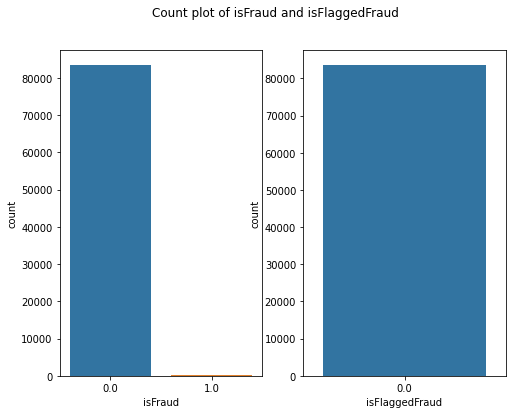

In [23]:
# Target class chart
plt.figure(figsize=(8,6))

plt.subplot(121)
ax = sns.countplot(data=df,x='isFraud')

plt.subplot(122)
ax = sns.countplot(data=df,x='isFlaggedFraud')

plt.suptitle('Count plot of isFraud and isFlaggedFraud')
plt.show()

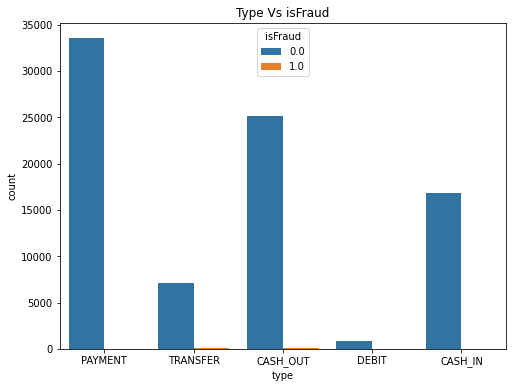

In [24]:
# Countplot of type feature
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df, x='type',hue='isFraud')
plt.title('Type Vs isFraud')
plt.show();

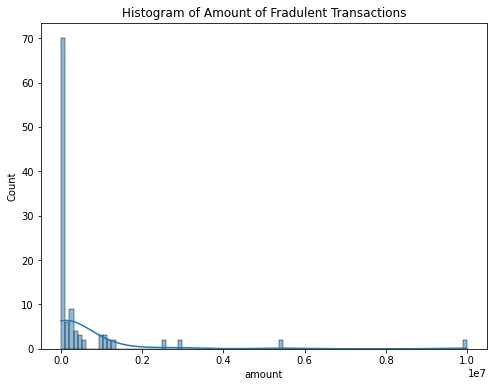

In [25]:
# Histogram of Amount feature based on fraud
plt.figure(figsize=(8,6))
sns.histplot(data=df[df['isFraud']==1],x='amount',kde=True)
plt.title('Histogram of Amount of Fradulent Transactions')
plt.show();

Most of the fraudulent transactions are below the amount of 200,000.

#Prepare data for Modeling + Preprocessing

Unsupervised Learning: Remove "isFlaggedFraud" column to see if the model can learn which transactions are fraud without that column.

In [26]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [27]:
# Save X data
X = df.drop(columns = ['isFraud','step','nameOrig','nameDest','isFlaggedFraud'])
# Encode our target
y = df['isFraud']

In [28]:
X.shape

(83560, 6)

In [29]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [30]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
# PCA
pca = PCA()

In [31]:
# Numeric pipeline
numeric_pipe = make_pipeline(scaler)
numeric_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [32]:
# Categorical pipeline
categorical_pipe = make_pipeline(ohe)
categorical_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [33]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f6df0907ad0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f6df0907510>)])

In [34]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f6df0907ad0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f6df0907510>)])

In [35]:
X_train.shape

(62670, 6)

In [36]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [37]:
pca.fit(X_train_processed)

PCA()

In [38]:
X_train_processed.shape

(62670, 10)

There are 10 columns before PCA.

Text(0, 0.5, 'Proportion of Explained Variance')

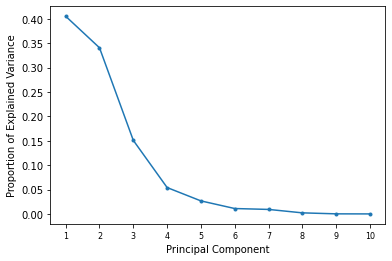

In [39]:
# Visualize the Scree Plot
plt.plot(range(1, 11), pca.explained_variance_ratio_[:10], marker = '.')
plt.xticks(ticks = range(1, 11), fontsize=8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

In [40]:
# Instantiate PCA, fit and transform to the model
pca3 = PCA(n_components=3)
X_train = pca3.fit_transform(X_train_processed)
X_test = pca3.transform(X_test_processed)
X_train.shape

(62670, 3)

Since we are trying to classify whether a transaction is fraud or not, this means that we are doing a binary classification. I will be using the sigmoid activation function for the output layer, use BCE for the loss, and adam for the optimizer.

In [41]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train.shape[1]
input_shape

3

#Unsupervised Learning - Model 1 (Binary Classification)

In [42]:
# Sequential model
model = Sequential()

In [43]:
# First hidden layer
model.add(Dense(3, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(3, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
# Output layer
model.add(Dense(1, activation = 'sigmoid'))

In [44]:
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam', metrics = ['accuracy'])

In [45]:
# Step 3: Fit our model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=10)

Epoch 1/10
1959/1959 [==============================] - 14s 6ms/step - loss: 0.0668 - accuracy: 0.9986 - val_loss: 0.0110 - val_accuracy: 0.9986
Epoch 2/10
1959/1959 [==============================] - 11s 6ms/step - loss: 0.0101 - accuracy: 0.9987 - val_loss: 0.0107 - val_accuracy: 0.9986
Epoch 3/10
1959/1959 [==============================] - 8s 4ms/step - loss: 0.0098 - accuracy: 0.9987 - val_loss: 0.0103 - val_accuracy: 0.9986
Epoch 4/10
1959/1959 [==============================] - 4s 2ms/step - loss: 0.0095 - accuracy: 0.9987 - val_loss: 0.0104 - val_accuracy: 0.9986
Epoch 5/10
1959/1959 [==============================] - 4s 2ms/step - loss: 0.0094 - accuracy: 0.9987 - val_loss: 0.0102 - val_accuracy: 0.9986
Epoch 6/10
1959/1959 [==============================] - 4s 2ms/step - loss: 0.0092 - accuracy: 0.9987 - val_loss: 0.0100 - val_accuracy: 0.9986
Epoch 7/10
1959/1959 [==============================] - 5s 2ms/step - loss: 0.0091 - accuracy: 0.9987 - val_loss: 0.0098 - val_accurac

In [46]:
# You can use this function to see how your model improves over time
def plot_history(history, metric=None):
  """plot loss and passed metric.  metric is passed as string and must match 'metric'
  argument in the compile step"""
  fig, axes = plt.subplots(2,1, figsize = (5,10))
  axes[0].plot(history.history['loss'], label = "train")
  axes[0].plot(history.history['val_loss'], label='test')
  axes[0].set_title('Loss')
  axes[0].legend()
  if metric:
    axes[1].plot(history.history[metric], label = 'train')
    axes[1].plot(history.history['val_' + metric], label = 'test')
    axes[1].set_title(metric)
    axes[1].legend()

  plt.show()

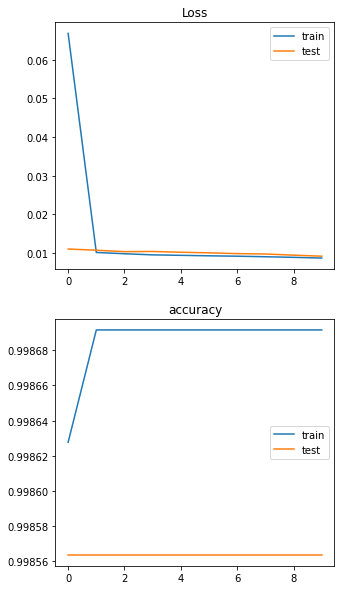

In [47]:
plot_history(history, 'accuracy')

Training Scores


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     62588
         1.0       0.00      0.00      0.00        82

    accuracy                           1.00     62670
   macro avg       0.50      0.50      0.50     62670
weighted avg       1.00      1.00      1.00     62670



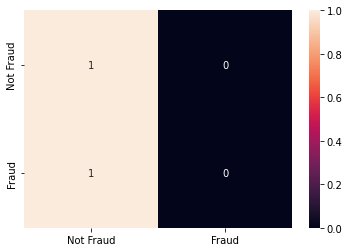



Testing Scores


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20860
         1.0       0.00      0.00      0.00        30

    accuracy                           1.00     20890
   macro avg       0.50      0.50      0.50     20890
weighted avg       1.00      1.00      1.00     20890



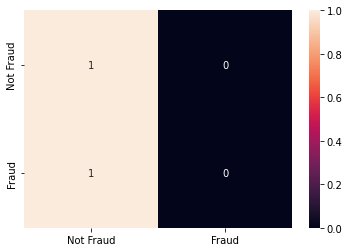

In [48]:
# Make predicitons and evaluate your model
print('Training Scores')

# Define labels for the confusion matrix
labels = ['Not Fraud', 'Fraud']

# Get training predictions and round them to integers instead of floats
train_preds = np.rint(model.predict(X_train))

# Classification Report
print(classification_report(y_train, train_preds))

# Confusion Matrix
conf_mat = confusion_matrix(y_train, train_preds, normalize='true')
heatmap(conf_mat, xticklabels=labels, yticklabels=labels, annot=True)
plt.show()
print('\n')
print('Testing Scores')

# Get testing predictions and round them to integers
test_preds = np.rint(model.predict(X_test))

# Classification report
print(classification_report(y_test, test_preds))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, test_preds, normalize='true')
heatmap(conf_mat, xticklabels=labels, yticklabels=labels, annot=True)
plt.show()

#Unsupervised Learning - Model 2 (Binary Classification)

In [49]:
# Sequential model
model2 = Sequential()

# First hidden layer
model2.add(Dense(10, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model2.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
# Output layer
model2.add(Dense(1, activation = 'sigmoid'))

# Step 2: Compile
model2.compile(loss = 'bce', optimizer = 'adam', metrics = ['accuracy'])

# Step 3: Fit our model
history2 = model2.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=10)

Epoch 1/10
1959/1959 [==============================] - 5s 2ms/step - loss: 0.0670 - accuracy: 0.9806 - val_loss: 0.0112 - val_accuracy: 0.9986
Epoch 2/10
1959/1959 [==============================] - 4s 2ms/step - loss: 0.0112 - accuracy: 0.9987 - val_loss: 0.0106 - val_accuracy: 0.9986
Epoch 3/10
1959/1959 [==============================] - 4s 2ms/step - loss: 0.0098 - accuracy: 0.9987 - val_loss: 0.0100 - val_accuracy: 0.9986
Epoch 4/10
1959/1959 [==============================] - 5s 2ms/step - loss: 0.0092 - accuracy: 0.9987 - val_loss: 0.0097 - val_accuracy: 0.9986
Epoch 5/10
1959/1959 [==============================] - 5s 2ms/step - loss: 0.0088 - accuracy: 0.9987 - val_loss: 0.0088 - val_accuracy: 0.9986
Epoch 6/10
1959/1959 [==============================] - 4s 2ms/step - loss: 0.0084 - accuracy: 0.9987 - val_loss: 0.0085 - val_accuracy: 0.9987
Epoch 7/10
1959/1959 [==============================] - 5s 2ms/step - loss: 0.0081 - accuracy: 0.9987 - val_loss: 0.0081 - val_accuracy:

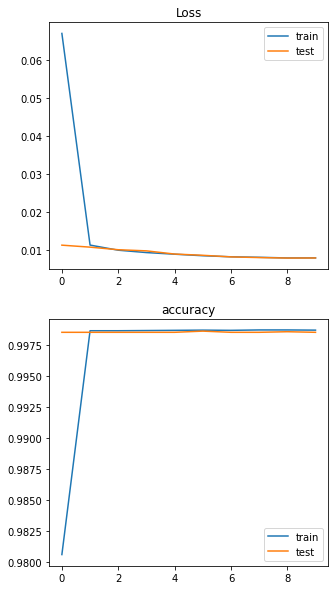

In [50]:
# Visualize the loss
plot_history(history2, 'accuracy')

Training Scores
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     62588
         1.0       1.00      0.05      0.09        82

    accuracy                           1.00     62670
   macro avg       1.00      0.52      0.55     62670
weighted avg       1.00      1.00      1.00     62670



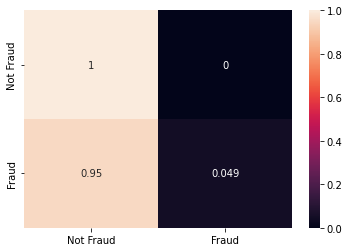



Testing Scores
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20860
         1.0       0.50      0.03      0.06        30

    accuracy                           1.00     20890
   macro avg       0.75      0.52      0.53     20890
weighted avg       1.00      1.00      1.00     20890



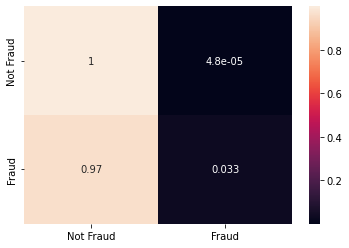

In [51]:
# Make predicitons and evaluate your model
print('Training Scores')

# Define labels for the confusion matrix
labels = ['Not Fraud', 'Fraud']

# Get training predictions and round them to integers instead of floats
train_preds2 = np.rint(model2.predict(X_train))

# Classification Report
print(classification_report(y_train, train_preds2))

# Confusion Matrix
conf_mat = confusion_matrix(y_train, train_preds2, normalize='true')
heatmap(conf_mat, xticklabels=labels, yticklabels=labels, annot=True)
plt.show()
print('\n')
print('Testing Scores')

# Get testing predictions and round them to integers
test_preds2 = np.rint(model2.predict(X_test))

# Classification report
print(classification_report(y_test, test_preds2))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, test_preds2, normalize='true')
heatmap(conf_mat, xticklabels=labels, yticklabels=labels, annot=True)
plt.show()

#Unsupervised Learning - Model 3 (Binary Classification)

In [52]:
# Sequential model
model4 = Sequential()

# First hidden layer
model4.add(Dense(10, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model4.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
# Third hidden layer
model4.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
# Output layer
model4.add(Dense(1, activation = 'sigmoid'))

# Step 2: Compile
model4.compile(loss = 'bce', optimizer = 'adam', metrics = ['accuracy'])

# Step 3: Fit our model
history4 = model4.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=10)

Epoch 1/10
1959/1959 [==============================] - 5s 2ms/step - loss: 0.0693 - accuracy: 0.9811 - val_loss: 0.0109 - val_accuracy: 0.9986
Epoch 2/10
1959/1959 [==============================] - 4s 2ms/step - loss: 0.0104 - accuracy: 0.9987 - val_loss: 0.0106 - val_accuracy: 0.9986
Epoch 3/10
1959/1959 [==============================] - 5s 2ms/step - loss: 0.0098 - accuracy: 0.9987 - val_loss: 0.0102 - val_accuracy: 0.9986
Epoch 4/10
1959/1959 [==============================] - 4s 2ms/step - loss: 0.0096 - accuracy: 0.9987 - val_loss: 0.0101 - val_accuracy: 0.9986
Epoch 5/10
1959/1959 [==============================] - 4s 2ms/step - loss: 0.0093 - accuracy: 0.9987 - val_loss: 0.0099 - val_accuracy: 0.9986
Epoch 6/10
1959/1959 [==============================] - 5s 3ms/step - loss: 0.0089 - accuracy: 0.9987 - val_loss: 0.0091 - val_accuracy: 0.9986
Epoch 7/10
1959/1959 [==============================] - 5s 3ms/step - loss: 0.0085 - accuracy: 0.9987 - val_loss: 0.0087 - val_accuracy:

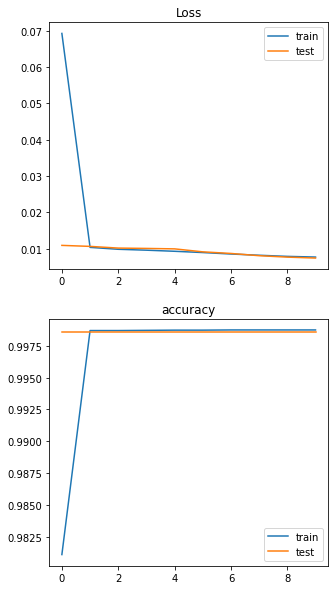

In [53]:
# Visualize the loss
plot_history(history4, 'accuracy')

Training Scores
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     62588
         1.0       1.00      0.04      0.07        82

    accuracy                           1.00     62670
   macro avg       1.00      0.52      0.53     62670
weighted avg       1.00      1.00      1.00     62670



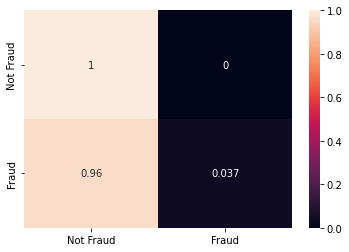



Testing Scores


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20860
         1.0       0.00      0.00      0.00        30

    accuracy                           1.00     20890
   macro avg       0.50      0.50      0.50     20890
weighted avg       1.00      1.00      1.00     20890



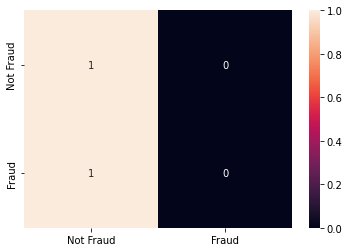

In [54]:
# Make predicitons and evaluate your model
print('Training Scores')

# Define labels for the confusion matrix
labels = ['Not Fraud', 'Fraud']

# Get training predictions and round them to integers instead of floats
train_preds4 = np.rint(model4.predict(X_train))

# Classification Report
print(classification_report(y_train, train_preds4))

# Confusion Matrix
conf_mat = confusion_matrix(y_train, train_preds4, normalize='true')
heatmap(conf_mat, xticklabels=labels, yticklabels=labels, annot=True)
plt.show()
print('\n')
print('Testing Scores')

# Get testing predictions and round them to integers
test_preds4 = np.rint(model4.predict(X_test))

# Classification report
print(classification_report(y_test, test_preds4))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, test_preds4, normalize='true')
heatmap(conf_mat, xticklabels=labels, yticklabels=labels, annot=True)
plt.show()

#Supervised Learning

Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [56]:
dec_tree = DecisionTreeClassifier(random_state = 42)

In [57]:
# Looking at some hyperparameters that seem tunable
dec_tree

DecisionTreeClassifier(random_state=42)

In [58]:
dec_tree.fit(X_train_processed, y_train)

DecisionTreeClassifier(random_state=42)

In [59]:
dec_tree.predict(X_test_processed)

array([0., 0., 0., ..., 0., 0., 0.])

In [60]:
# calculate classification accuracy
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

1.0
0.9988989947343226


Bagging Classifier

In [61]:
bagcla = BaggingClassifier(random_state = 42)

In [62]:
# Look at the hyperparameters
bagcla.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [63]:
bagcla.fit(X_train_processed, y_train)

BaggingClassifier(random_state=42)

In [64]:
bagcla.predict(X_test_processed)

array([0., 0., 0., ..., 0., 0., 0.])

In [65]:
bagcla_train_score = bagcla.score(X_train_processed, y_train)
bagcla_test_score = bagcla.score(X_test_processed, y_test)
print(bagcla_train_score)
print(bagcla_test_score)

0.9998404340194671
0.9991383437051221


Random Forest Classifier

In [66]:
rf = RandomForestClassifier(random_state = 42)

In [67]:
# Looking at some hyperparameters that seem tunable
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [68]:
rf.fit(X_train_processed, y_train)

RandomForestClassifier(random_state=42)

In [69]:
rf.predict(X_test_processed)

array([0., 0., 0., ..., 0., 0., 0.])

In [70]:
rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)
print(rf_train_score)
print(rf_test_score)

1.0
0.9993298228817616


KNN Classifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn = KNeighborsClassifier(n_neighbors=1)

In [73]:
print(knn)

KNeighborsClassifier(n_neighbors=1)


In [74]:
knn.fit(X_train_processed, y_train)

KNeighborsClassifier(n_neighbors=1)

In [75]:
predictions_knn = knn.predict(X_test_processed)

In [76]:
predictions_knn

array([0., 0., 0., ..., 0., 0., 0.])

In [77]:
# calculate classification accuracy
knn_score = knn.score(X_test_processed, y_test)
knn_score

0.9984202967927238